In [1]:
# Importing the important libraries and functions from the libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Connecting to the csv file and printing the first 5 rows from the file:

googleApp=pd.read_csv("C:\\Users\\pooja\\Downloads\\Python project\\googleplaystore.csv")
googleApp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Checking if there is any null value: Oh!! There are many..

googleApp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
# Dropping the null values:

googleApp.dropna(inplace=True)

In [5]:
# Checking if the nulls have dropped...Yeah !!

googleApp.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [6]:
googleApp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
googleApp.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
print(googleApp.Size.value_counts())

Varies with device    1637
14M                    165
12M                    161
11M                    159
15M                    159
                      ... 
18k                      1
585k                     1
313k                     1
498k                     1
920k                     1
Name: Size, Length: 413, dtype: int64


In [9]:
def change(Size):
    if 'M'in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x

    elif 'k'in Size:
        x=Size[:-1]
        x=float(x)
        return x
    
    else: return None
googleApp.Size=googleApp.Size.map(change)

In [10]:
app1=googleApp.Size
num=pd.to_numeric(app1, errors='ignore')
print(num)

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64


In [11]:
print(googleApp.Size.isnull().sum())
googleApp.dropna()

1637


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [12]:
googleApp.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [13]:
#Changing the Reviews columns datatype:

googleApp['Reviews']=pd.to_numeric(googleApp['Reviews'], downcast='integer', errors='ignore')

In [14]:
# Checking the data type of Reviews column:

googleApp.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
# checking if Size column has any "Varies with device" ..Yeah its removed!!
googleApp.Size.unique

<bound method Series.unique of 0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64>

In [16]:
# Removing , sign from the Installs column:

googleApp['Installs'] = googleApp['Installs'].replace({'[,]': ''}, regex=True)

In [17]:
# Hurray its done!!

googleApp.Installs

0           10000+
1          500000+
2         5000000+
3        50000000+
4          100000+
           ...    
10834         500+
10836        5000+
10837         100+
10839        1000+
10840    10000000+
Name: Installs, Length: 9360, dtype: object

In [18]:
#Removing + sign from the Installs column:

googleApp['Installs'] = googleApp['Installs'].str.rstrip('+')

In [19]:
# yeah its done!!

googleApp.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: object

In [20]:
# Changing datatype of the Installs column!

googleApp.Installs=googleApp.Installs.astype(int)

In [21]:
# Hurray the datatype of the Installs column is changed!!

googleApp.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [22]:
# Is there any $ sign in Price column oh there it is!!!

googleApp.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [23]:
# $ sign removed from the Price column Lets See!!

googleApp['Price'] = googleApp['Price'].replace({'\$': ''}, regex=True)

In [24]:
# $ sign removed Hurray!!

googleApp.Price.unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [25]:
#datatype of Price column is changed to float

googleApp.Price=googleApp.Price.astype(float)

In [26]:
googleApp.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [27]:
googleApp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
#Reviews checked there are no reviews greater than 5 and less than 1

df_sorted=googleApp.sort_values(by='Rating',ascending=False) 
df_sorted

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21000.0,100,Free,0.0,Everyone,Events,"July 3, 2018",1.0.5,4.4 and up
9517,Ek Vote,PRODUCTIVITY,5.0,43,6200.0,500,Free,0.0,Everyone,Productivity,"November 7, 2017",1.1,4.0.3 and up
9427,ei Calc,TOOLS,5.0,2,19000.0,10,Free,0.0,Everyone,Tools,"October 12, 2015",1.2.2,2.3 and up
7367,"Startupticker.ch News, Events",NEWS_AND_MAGAZINES,5.0,4,10000.0,100,Free,0.0,Everyone,News & Magazines,"July 23, 2018",2.0.0,4.4 and up
9444,"Kolkata News:Anandbazar Patrika,ei samay&AllRa...",NEWS_AND_MAGAZINES,5.0,10,5000.0,100,Free,0.0,Everyone,News & Magazines,"July 14, 2018",1.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13000.0,100,Free,0.0,Everyone,Communication,"October 6, 2017",1.0,4.1 and up
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41000.0,500,Free,0.0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up
7383,Thistletown CI,PRODUCTIVITY,1.0,1,6600.0,100,Free,0.0,Everyone,Productivity,"March 15, 2018",41.9,4.1 and up
7144,CB Mobile Biz,FINANCE,1.0,3,8400.0,500,Free,0.0,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up


In [29]:
#creating a copy of a dtaframe:

datafCopy=googleApp.copy()
datafCopy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [30]:
#Dropping the rows where reviews are more than installs!!

print(len(datafCopy[datafCopy.Reviews>datafCopy.Installs]))
d=datafCopy.drop(index=datafCopy[datafCopy['Reviews']>datafCopy['Installs']].index)
d

7


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [31]:
#Checking if any app type is free but price is greater than 0...wow!!Theres none...
d={}
a=datafCopy
for col in a.itertuples():
    d[col[7]]=col[8]
    print(d)

{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free': 0.0}
{'Free

{'Free': 0.0, 'Paid': 3.49}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid'

{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 79.99}
{'Free': 0.0, 'Paid': 9.0}
{'Free': 0.0, 'Paid': 9.0}
{'Free': 0.0, 'Paid': 9.0}
{'Free': 0.0, 'Paid': 9.0}
{'Free': 0.0, 'Paid': 9.0}
{'Free': 0.0, 'Paid': 9.0}
{'Free': 0.0, 'Paid': 24.99}
{'Free': 0.0, 'Paid': 24.99}
{'Free': 0.0, 'Paid': 24.99}
{'Free': 0.0, 'Paid': 24.99}
{'Free': 0.0, 'Paid': 24.99}
{'Free': 0.0, 'Paid': 24.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 10.0}
{'Free': 0.0, 'Paid': 10.0}
{'Free': 0.0, 'Paid': 10.0}
{'Free': 0.0, 'Paid': 10.0}
{'Free': 0.0, 'Paid': 10.0}
{'Free': 0.0, 'Paid': 16.99}
{'Free': 0.0, 'Paid': 11.99}
{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 14.99}
{'Free': 0.0, 'Paid': 14.99}
{'Free': 0.0, 'Paid': 14.99}
{'Free': 0.0, 'Paid': 14.99}
{'Free': 0.

{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 29.99}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0

{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid': 4.49}
{'Free': 0.0, 'Paid'

{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 9.99}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid': 2.49}
{'Free': 0.0, 'Paid'

{'Free': 0.0, 'Paid': 2.99}
{'Free': 0.0, 'Paid': 2.99}
{'Free': 0.0, 'Paid': 2.99}
{'Free': 0.0, 'Paid': 4.59}
{'Free': 0.0, 'Paid': 4.59}
{'Free': 0.0, 'Paid': 4.59}
{'Free': 0.0, 'Paid': 4.59}
{'Free': 0.0, 'Paid': 4.59}
{'Free': 0.0, 'Paid': 4.59}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid'

{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 1.49}
{'Free': 0.0, 'Paid': 1.49}
{'Free': 0.0, 'Paid': 1.49}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 4.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 0.99}
{'Free': 0.0, 'Paid': 3.99}
{'Free': 0.0, 'Paid': 1.49}
{'Free': 0.0, 'Paid': 1.49}
{'Free': 0.0, 'Paid': 1.49}
{'Free': 0.0, 'Paid': 1.49}
{'Free': 0.0, 'Paid'

{'whiskers': [<matplotlib.lines.Line2D at 0x2b1ed43a490>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1ed43ab50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1ed43a130>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1ec369250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b1ec3695b0>],
 'means': []}

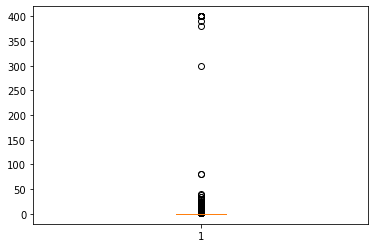

In [32]:
#boxplot for price:

plt.boxplot(datafCopy.Price)


In [33]:
#Checking for outliers In Price:

#Here there are rows like row no.5917 and 10697 with 5 star ratings where its a paid app but with very few installations as 
# low as just one and reviews greater than installs which cant be possible,so it comes under outliers 

datafCopy[(datafCopy.Price>0) & (datafCopy.Reviews<10) & (datafCopy.Rating>4)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2086,Sago Mini Big City,FAMILY,4.2,8,44000.0,1000,Paid,3.99,Everyone,Education;Pretend Play,"July 9, 2018",1.1,4.4 and up
2172,World Racers family board game,FAMILY,4.8,4,42000.0,100,Paid,0.99,Everyone,Board;Pretend Play,"September 3, 2015",1.1,5.1 and up
2262,Super Hearing Secret Voices Recorder PRO,MEDICAL,5.0,3,23000.0,100,Paid,2.99,Everyone,Medical,"April 20, 2018",1.0,4.1 and up
2269,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6500.0,100,Paid,12.99,Everyone,Medical,"July 25, 2018",7,3.0 and up
2271,FHR 5-Tier 2.0,MEDICAL,5.0,2,1200.0,500,Paid,2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up
2284,Recognise Foot,MEDICAL,4.2,9,95000.0,1000,Paid,7.49,Everyone,Medical,"September 14, 2017",1.0.3,4.1 and up
2286,Pain Tracker & Diary,MEDICAL,4.3,3,4600.0,100,Paid,2.99,Everyone,Medical,"January 2, 2018",1.50,4.1 and up
2409,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6500.0,100,Paid,12.99,Everyone,Medical,"July 25, 2018",7,3.0 and up
3957,ADS-B Driver,TOOLS,5.0,2,6300.0,100,Paid,1.99,Everyone,Tools,"May 15, 2018",1.19,4.4 and up
4192,Deaf - Hearing chat device H,COMMUNICATION,4.4,9,51.0,500,Paid,3.99,Everyone,Communication,"February 8, 2017",3.6,2.2 and up


{'whiskers': [<matplotlib.lines.Line2D at 0x2b1ed71fb50>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1ed72d250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1ed71f7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1ed72d910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b1ed72dc70>],
 'means': []}

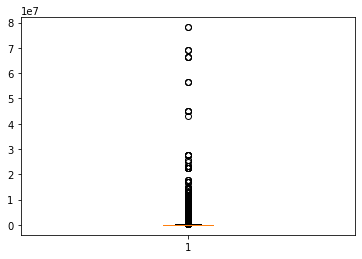

In [34]:
#boxplot for Reviews with outliers:

plt.boxplot(datafCopy.Reviews)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b1ed786b20>,
 'caps': [<matplotlib.lines.Line2D at 0x2b1ed793220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1ed7867c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b1ed7938e0>],
 'fliers': [],
 'means': []}

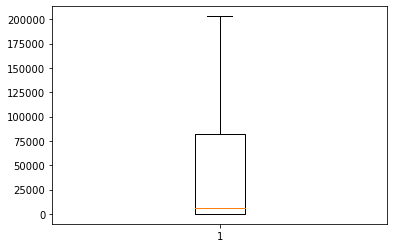

In [35]:
#boxplot for Reviews without outliers:

plt.boxplot(datafCopy.Reviews,0,sym='')

In [36]:
#Checking for Reviews outliers:
#Here there are Reviews more than Installs which cant be possible as those who have installed the application 
#are allowed to review the app.

datafCopy[(datafCopy.Installs<10) & (datafCopy.Reviews<50)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2450,Tablet Reminder,MEDICAL,5.0,4,2500.0,5,Free,0.00,Everyone,Medical,"August 3, 2018",1.0,4.1 and up
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4600.0,5,Free,0.00,Everyone,Medical,"August 2, 2018",2.0,4.0 and up
2484,Clinic Doctor EHr,MEDICAL,5.0,2,7100.0,5,Free,0.00,Everyone,Medical,"August 3, 2018",1.0.51.0.3,8.0 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7147,CB Heroes,SOCIAL,5.0,5,1800.0,5,Free,0.00,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up
7731,CQ ESPM,BUSINESS,5.0,2,3400.0,5,Free,0.00,Everyone,Business,"June 3, 2017",1.0.1,4.1 and up
8146,CZ-Help,BOOKS_AND_REFERENCE,5.0,2,1400.0,5,Free,0.00,Everyone,Books & Reference,"July 13, 2018",0.1,4.4 and up
9218,EB Cash Collections,BUSINESS,5.0,1,4300.0,5,Free,0.00,Everyone,Business,"July 31, 2018",1.10,4.4 and up


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

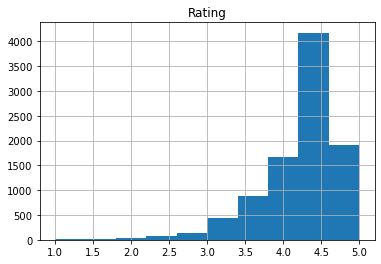

In [37]:
#Histogram for Rating:
#Yes it is more towards higher ratings 
#i.e Most of the ratings are between the range 4 star and 4.6 star

datafCopy.hist(column='Rating')

array([[<AxesSubplot:title={'center':'Size'}>]], dtype=object)

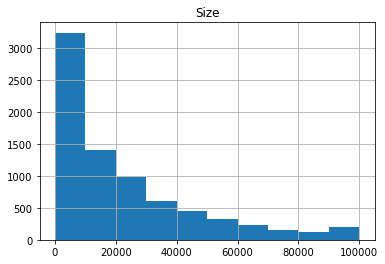

In [38]:
#Histogram for Size:

datafCopy.hist(column='Size')

In [39]:
# Apps with prices between 200 and 400
# Yes applications with Price more than 200 is high, among so many application only around 16 applications are priced above 
#200

datafCopy[(datafCopy.Price>200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [40]:
# dropping the applications with price above 200:

df=datafCopy.drop(index=datafCopy[(datafCopy.Price>200)].index)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [41]:
#Checking if the prices more than 200dollar has been dropped:
df[(df.Price>200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [42]:
#Checking Reviews more than 2million:
df[(df.Reviews>2000000)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,NaN,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,NaN,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [43]:
# Dropping Reviews with more than 2million values:

df1=df.drop(index=df[(df.Reviews>2000000)].index)
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [44]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [45]:
#Checking if Reviews more than 2million values has been dropped:

df1[(df1.Reviews>2000000)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


array([[<AxesSubplot:title={'center':'Reviews'}>]], dtype=object)

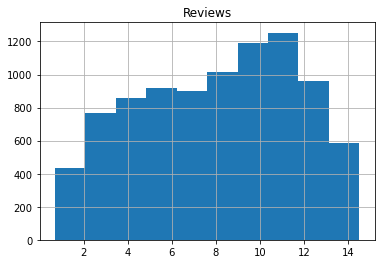

In [46]:
#Outlier treatment for Reviews by using log:
df1.Reviews=df1.Reviews.apply(func=np.log1p)
df1.hist(column=['Reviews'])

In [47]:
#outlier Correction:

df1.describe()

,Rating,Reviews,Size,Installs,Price
count,8892.000000,8892.000000,7489.000000,8.892000e+03,8892.000000
mean,4.180139,8.021326,22021.694151,6.262446e+06,0.350172
std,0.524259,3.572842,22575.790119,3.538610e+07,2.220943
min,1.000000,0.693147,8.500000,1.000000e+00,0.000000
25%,4.000000,5.075174,5100.000000,1.000000e+04,0.000000
50%,4.300000,8.362992,14000.000000,5.000000e+05,0.000000
75%,4.500000,10.947613,31000.000000,5.000000e+06,0.000000
max,5.000000,14.501668,100000.000000,1.000000e+09,79.990000


In [48]:
#here we are taking the min and max threshold, we will then check the values less than min threshold and max threshold and
#then will discard the values which are more than max threshold

min_threshold, max_threshold=df1.Installs.quantile([.10,.50])
min_threshold, max_threshold

(1000.0, 500000.0)

In [49]:
#Values less than min_threshold:

df1[df1.Installs<min_threshold]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,1.098612,17000.0,100,Paid,7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up
605,Cardi B Live Stream Video Chat - Prank,DATING,4.4,3.367296,3400.0,500,Free,0.00,Everyone,Dating,"July 16, 2018",2.5,4.0.3 and up
608,Chat Kids - Chat Room For Kids,DATING,4.7,1.945910,4900.0,100,Free,0.00,Mature 17+,Dating,"July 24, 2018",1.0,4.0.3 and up
611,MouseMingle,DATING,2.7,1.386294,3900.0,100,Free,0.00,Mature 17+,Dating,"July 17, 2018",1.0.0,4.4 and up
615,Awake Dating,DATING,5.0,1.098612,70000.0,100,Free,0.00,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,Monster Ride Pro,GAME,5.0,0.693147,24000.0,10,Free,0.00,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10805,Scoreboard FR,LIFESTYLE,4.3,1.386294,15000.0,100,Free,0.00,Everyone,Lifestyle,"August 7, 2018",2.1,4.2 and up
10810,Fr Lupupa Sermons,BUSINESS,4.8,2.995732,21000.0,100,Free,0.00,Everyone,Business,"June 12, 2018",1.0,4.4 and up
10834,FR Calculator,FAMILY,4.0,2.079442,2600.0,500,Free,0.00,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up


In [50]:
#Values less than max threshold:

df1[df1.Installs>max_threshold]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,10.513688,29000.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,9.531844,33000.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,9.538276,28000.0,1000000,Free,0.0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10797,Fuel Rewards® program,LIFESTYLE,4.6,10.386963,46000.0,1000000,Free,0.0,Everyone,Lifestyle,"June 26, 2018",2.9.1,5.0 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,10.941943,81000.0,1000000,Free,0.0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,12.837940,24000.0,1000000,Free,0.0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,11.390611,NaN,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [51]:
#Creating a new dataframe by dropping the values which are more than max threshold
dfNew=df1[(df1.Installs<max_threshold)]
dfNew.shape

(4400, 13)

In [52]:
#Viewing New dataframe:

#dfNew
dfNew['Reviews']=dfNew.Reviews.astype(int)
dfNew

<ipython-input-52-2a4f07e34977>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['Reviews']=dfNew.Reviews.astype(int)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,5,19000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,4,3100.0,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3,619.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,2,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,3,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


[[<AxesSubplot:title={'center':'Rating'}>
  <AxesSubplot:title={'center':'Reviews'}>]
 [<AxesSubplot:title={'center':'Size'}>
  <AxesSubplot:title={'center':'Installs'}>]
 [<AxesSubplot:title={'center':'Price'}> <AxesSubplot:>]]


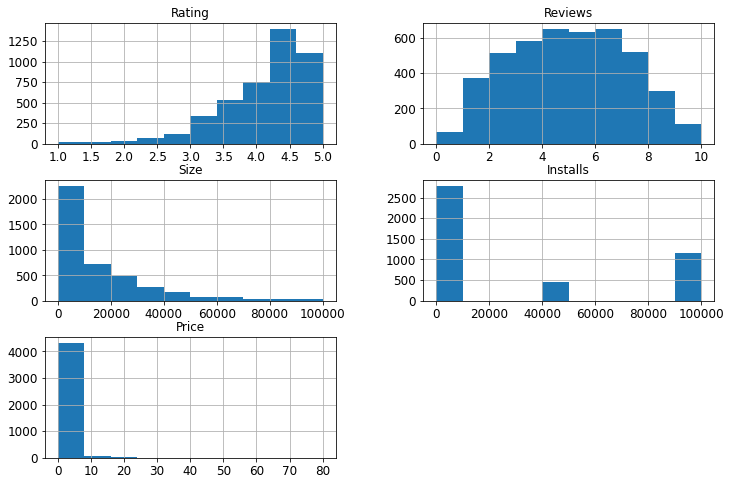

In [53]:
#Histogram representation after treating outlier:

print(dfNew.hist(['Rating','Reviews','Size','Installs','Price'],figsize=(12,8),xlabelsize=12,ylabelsize=12))

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


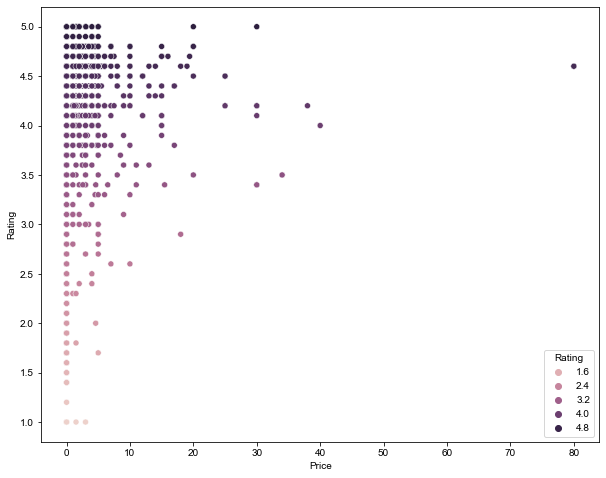

In [54]:
#Making Scatter plot to show the relation between Rating vs Price:
#The Pattern is not evenly distributed as we can see that the paid applications are having higher ratings, 
#although many of them are at low price 


plt.figure(figsize=(10,8))
sns.scatterplot(dfNew.Price,dfNew.Rating,hue=dfNew.Rating)
sns.set_style(style='whitegrid')
plt.show()

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


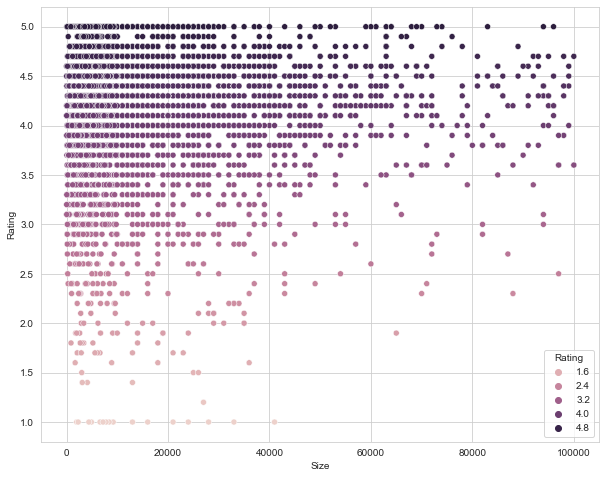

In [55]:
#Making Scatter plot to show the relation between Rating vs Size:
#The points are distributed evenly though it is no very clear pattern, 
#but it is looking like more heavy the app better the rating

plt.figure(figsize=(10,8))
sns.scatterplot(dfNew.Size,dfNew.Rating,hue=dfNew.Rating)
sns.set_style(style='whitegrid')
plt.show()

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


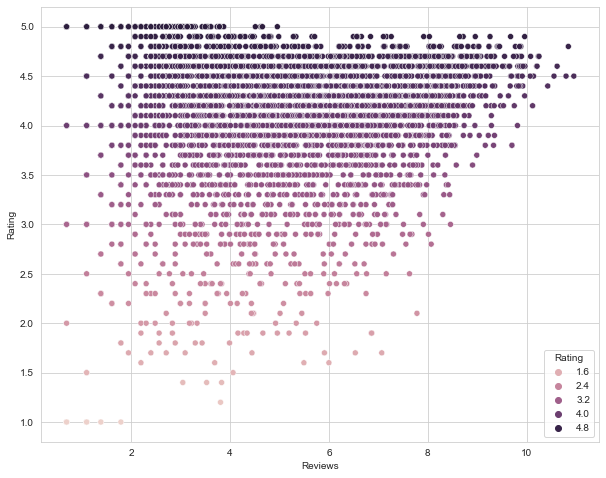

In [56]:
#Making Scatter plot to show the relation between Rating vs Reviews:
#Pattern is not very clear.Ratings are higher for the popular applications as they have more reviews.
#There are also few low rated apps among the popular ones.
#The apps with low ratings are reviewed by very less people because those apps are not popular and 
#after all after certain period of time ratings does not depend on popularity,It should depend on usefulness of the app.



plt.figure(figsize=(10,8))
sns.scatterplot(df1.Reviews,df1.Rating,hue=dfNew.Rating)
plt.show()

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


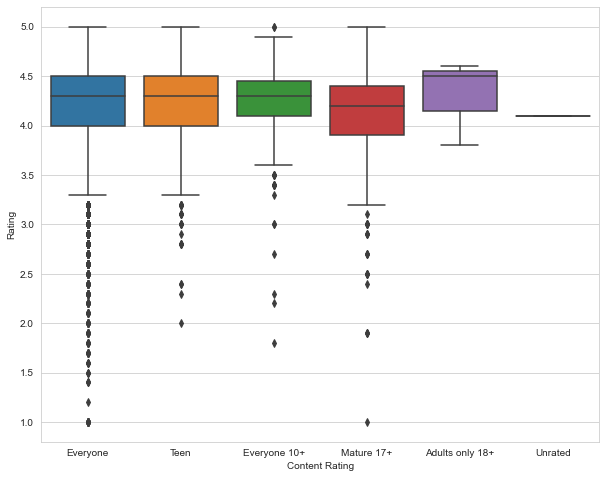

In [57]:
#Making Box plot to show the relation between Rating vs Content Rating:
#The Ratings for Content of 'Adults only 18+' is the highest.Ratings for rest all the other seems similar.

plt.figure(figsize=(10,8))
sns.boxplot(df1['Content Rating'],df1.Rating)
plt.show()

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


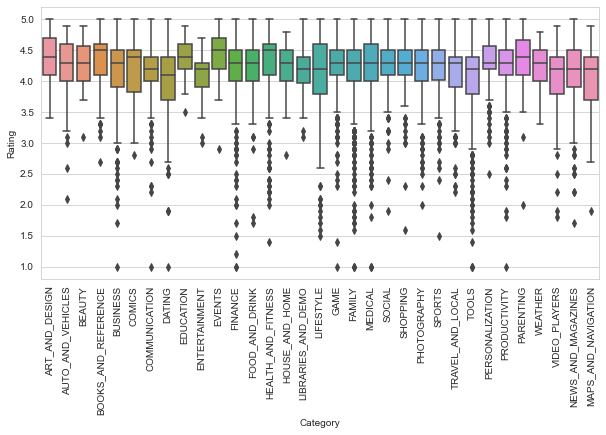

In [58]:
#Making Scatter plot to show the relation between Rating vs Category:
#Applications from the genre Books_and_reference,Events,Health_and_fitness have the highest median ratings.

plt.figure(figsize=(10,5))
plt.xticks(fontsize=10,rotation='vertical')
sns.boxplot(df1['Category'],df1.Rating)
plt.show()

In [59]:
#Creating copy of dataframe to make all the edits:
inp1=dfNew.copy()
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,5,19000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,4,3100.0,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3,619.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,2,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,3,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


array([[<AxesSubplot:title={'center':'Installs'}>]], dtype=object)

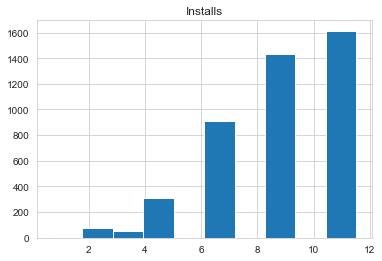

In [60]:
#Reducing the skewness from Reviews and Installs:

inp1.Installs=inp1.Installs.apply(func=np.log1p)
inp1.hist(column=['Installs'])

array([[<AxesSubplot:title={'center':'Reviews'}>]], dtype=object)

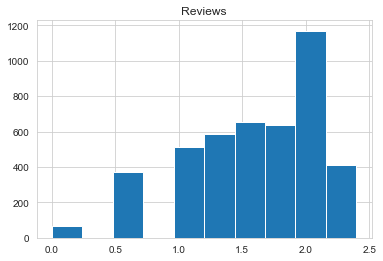

In [61]:
#Reducing the skewness from Reviews and Installs:

inp1.Reviews=inp1.Reviews.apply(func=np.log1p)
inp1.hist(column=['Reviews'])

In [62]:
#Copying inp1 data into inp2 and printing the shape:

inp2=inp1.copy()
inp2.shape

(4400, 13)

In [63]:
#Deleting variables which are not required:

inp2.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
inp2.shape

(4400, 9)

In [105]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,2.079442,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,4.744932,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [107]:

df1['Reviews'] = df1['Reviews'].replace({'[.]': ''}, regex=True)
#googleApp['Installs'] = googleApp['Installs'].replace({'[,]': ''}, regex=True)

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [64]:
inp1.shape

(4400, 13)

In [100]:
df.shape

(9345, 13)

In [66]:
#Dropping the columns which are object type:
#Dropping App column:

inApp=inp1.drop('App',axis=1)
inApp.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ART_AND_DESIGN,4.1,1.791759,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
4,ART_AND_DESIGN,4.3,1.945910,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,ART_AND_DESIGN,4.4,1.791759,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,ART_AND_DESIGN,3.8,1.791759,19000.0,10.819798,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
9,ART_AND_DESIGN,4.7,1.609438,3100.0,9.210440,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [67]:
#Dropping Last Updated column:

inApp=inApp.drop('Last Updated',axis=1)
inApp.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,ART_AND_DESIGN,4.1,1.791759,19000.0,9.210440,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up
4,ART_AND_DESIGN,4.3,1.945910,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up
5,ART_AND_DESIGN,4.4,1.791759,5600.0,10.819798,Free,0.0,Everyone,Art & Design,1.0,2.3 and up
6,ART_AND_DESIGN,3.8,1.791759,19000.0,10.819798,Free,0.0,Everyone,Art & Design,1.1,4.0.3 and up
9,ART_AND_DESIGN,4.7,1.609438,3100.0,9.210440,Free,0.0,Everyone,Art & Design;Creativity,2.8,4.0.3 and up


In [68]:
#Dropping Current Ver column:

inApp=inApp.drop('Current Ver',axis=1)
inApp.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,ART_AND_DESIGN,4.1,1.791759,19000.0,9.210440,Free,0.0,Everyone,Art & Design,4.0.3 and up
4,ART_AND_DESIGN,4.3,1.945910,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up
5,ART_AND_DESIGN,4.4,1.791759,5600.0,10.819798,Free,0.0,Everyone,Art & Design,2.3 and up
6,ART_AND_DESIGN,3.8,1.791759,19000.0,10.819798,Free,0.0,Everyone,Art & Design,4.0.3 and up
9,ART_AND_DESIGN,4.7,1.609438,3100.0,9.210440,Free,0.0,Everyone,Art & Design;Creativity,4.0.3 and up


In [69]:
#Dropping Android Ver column:

inApp=inApp.drop('Android Ver',axis=1)
inApp.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,1.791759,19000.0,9.210440,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,1.945910,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,1.791759,5600.0,10.819798,Free,0.0,Everyone,Art & Design
6,ART_AND_DESIGN,3.8,1.791759,19000.0,10.819798,Free,0.0,Everyone,Art & Design
9,ART_AND_DESIGN,4.7,1.609438,3100.0,9.210440,Free,0.0,Everyone,Art & Design;Creativity


In [70]:
#Dropping Genres column:

inApp=inApp.drop('Genres',axis=1)
inApp.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,1.791759,19000.0,9.210440,Free,0.0,Everyone
4,ART_AND_DESIGN,4.3,1.945910,2800.0,11.512935,Free,0.0,Everyone
5,ART_AND_DESIGN,4.4,1.791759,5600.0,10.819798,Free,0.0,Everyone
6,ART_AND_DESIGN,3.8,1.791759,19000.0,10.819798,Free,0.0,Everyone
9,ART_AND_DESIGN,4.7,1.609438,3100.0,9.210440,Free,0.0,Everyone


In [71]:
#Dropping Content Rating column:

inApp=inApp.drop('Content Rating',axis=1)
inApp.head()

,Category,Rating,Reviews,Size,Installs,Type,Price
0,ART_AND_DESIGN,4.1,1.791759,19000.0,9.210440,Free,0.0
4,ART_AND_DESIGN,4.3,1.945910,2800.0,11.512935,Free,0.0
5,ART_AND_DESIGN,4.4,1.791759,5600.0,10.819798,Free,0.0
6,ART_AND_DESIGN,3.8,1.791759,19000.0,10.819798,Free,0.0
9,ART_AND_DESIGN,4.7,1.609438,3100.0,9.210440,Free,0.0


In [72]:
#Dropping Category column:

inApp=inApp.drop('Category',axis=1)
inApp.head()

,Rating,Reviews,Size,Installs,Type,Price
0,4.1,1.791759,19000.0,9.210440,Free,0.0
4,4.3,1.945910,2800.0,11.512935,Free,0.0
5,4.4,1.791759,5600.0,10.819798,Free,0.0
6,3.8,1.791759,19000.0,10.819798,Free,0.0
9,4.7,1.609438,3100.0,9.210440,Free,0.0


In [73]:
#Dropping Type column:

inApp=inApp.drop('Type',axis=1)
inApp.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,1.791759,19000.0,9.210440,0.0
4,4.3,1.945910,2800.0,11.512935,0.0
5,4.4,1.791759,5600.0,10.819798,0.0
6,3.8,1.791759,19000.0,10.819798,0.0
9,4.7,1.609438,3100.0,9.210440,0.0


In [74]:
#dropping rows with NaN value if any:

inApp.dropna(inplace=True)
inApp.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,1.791759,19000.0,9.210440,0.0
4,4.3,1.945910,2800.0,11.512935,0.0
5,4.4,1.791759,5600.0,10.819798,0.0
6,3.8,1.791759,19000.0,10.819798,0.0
9,4.7,1.609438,3100.0,9.210440,0.0


In [75]:
inApp['Installs']=inApp.Installs.astype(int)

In [76]:
inApp.dtypes

Rating      float64
Reviews     float64
Size        float64
Installs      int32
Price       float64
dtype: object

In [77]:
inApp['Reviews']=inApp.Reviews.astype(int)

In [78]:
inApp['Size']=inApp.Size.astype(int)

In [79]:
inApp.dtypes

Rating      float64
Reviews       int32
Size          int32
Installs      int32
Price       float64
dtype: object

In [80]:
inApp.head(30)

,Rating,Reviews,Size,Installs,Price
0,4.1,1,19000,9,0.0
4,4.3,1,2800,11,0.0
5,4.4,1,5600,10,0.0
6,3.8,1,19000,10,0.0
9,4.7,1,3100,9,0.0
13,4.6,2,21000,11,0.0
14,4.4,2,37000,11,0.0
17,4.5,1,17000,9,0.0
20,4.0,1,14000,11,0.0
21,4.1,1,12000,11,0.0


In [108]:
#Applying Linear Regression:

x=inApp.drop('Rating',axis=1)
model=LinearRegression()
model.fit(x,inApp.Rating)
print('Intercept is ',model.intercept_)
print('Slopes are ',model.coef_)

Intercept is  4.4102813283714655
Slopes are  [ 2.85867876e-01  2.19523704e-07 -7.50585030e-02  2.56010067e-03]


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,inApp.Rating,test_size=0.30,random_state=1)
print('x_train shape is ',x_train.shape)
print('x_test shape is ',x_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',x_test.shape)

x_train shape is  (2918, 4)
x_test shape is  (1251, 4)
y_train shape is  (2918,)
y_test shape is  (1251, 4)


In [110]:
model=LinearRegression()
model.fit(x_train,y_train)
pdv=model.predict(x_test)
print("Mean Squared error is ",mean_squared_error(pdv,y_test))

Mean Squared error is  0.3867705596194009


In [111]:
mse=np.mean((pdv-y_test)**2)
print("Mean sum of errors is ",mse)

Mean sum of errors is  0.3867705596194006


In [112]:
print("R square value for the dataset is ",r2_score(pdv,y_test))

R square value for the dataset is  -20.37877691532284


In [86]:
results=OLS( y_train,x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              6035.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                        0.00
Time:                        19:13:55   Log-Likelihood:                         -5048.6
No. Observations:                2918   AIC:                                  1.011e+04
Df Residuals:                    2914   BIC:                                  1.013e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Reviews       -0.1156      0.065     -1.789      0.074      -0.242       0.011
Size        8.699e-06   1.33e-06      6.524      0.000    6.08e-06    1.13e-05
Installs       0.4477      0.009     48.033      0.000       0.429       0.466
Price          0.0597      0.008      7.944      0.000       0.045       0.074
==============================================================================
Omnibus:                      180.104   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.977
Skew:                           0.662   Prob(JB):                     3.43e-47
Kurtosis:                       3.088   Cond. No.                     6.56e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""